In [45]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

### **Simple Graph**

In [6]:
class AgentState(TypedDict):
    """
    Our state schema
    """
    message: str

def greeting_node(state:AgentState) -> AgentState:
    """
    Simple node that adds greeting message to the state
    """
    state["message"] = "Hey "+ state["message"] + " how is your day going?"
    return state

In [7]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")
app = graph.compile()

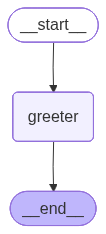

In [8]:
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke({"message":"Bob"})
result["message"]

'Hey Bob how is your day going?'

In [10]:
def complimentor(state:AgentState) -> AgentState:
    """
    Simple node to compliment the object in the state["message"]
    """
    state["message"] = state["message"] + " you are doing a good job"
    return state

graph_1 = StateGraph(AgentState)

graph_1.add_node("complimentor", complimentor)
graph_1.set_entry_point("complimentor")
graph_1.set_finish_point("complimentor")

app_1 = graph_1.compile()

In [11]:
result = app_1.invoke({"message":"Bob"})
result["message"]

'Bob you are doing a good job'


### **Multi Imput Graphs**


In [13]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    results: str

In [28]:
def process_values(state:AgentState) -> AgentState:
    """
    This handles multiple different input
    """
    state["results"] = f"Hi there {state["name"]}! your sum = {sum(state["values"])}"
    return state

In [29]:
g_3 = StateGraph(AgentState)
g_3.add_node("Processor",process_values)
g_3.set_entry_point("Processor")
g_3.set_finish_point("Processor")
a_3 = g_3.compile()

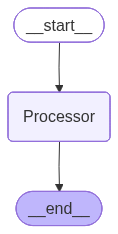

In [30]:
display(Image(a_3.get_graph().draw_mermaid_png()))

In [32]:
r_3 = a_3.invoke({"name":"flashy","values":[1,2,3,4,5,6]})
r_3

{'values': [1, 2, 3, 4, 5, 6],
 'name': 'flashy',
 'results': 'Hi there flashy! your sum = 21'}

### **Multi Node Graph**

In [34]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [41]:
def first(state: AgentState) -> AgentState:
    """
    First node of the sequence
    """
    state["final"] = f"Hi {state["name"]}"
    return state

def second(state: AgentState) -> AgentState:
    """
    Second node of the sequence
    """
    state["final"] += f" you are {state["age"]} years old!"
    return state

In [42]:
g_4 = StateGraph(AgentState)
g_4.add_node("namer",first)
g_4.add_node("age teller",second)
g_4.set_entry_point("namer")
g_4.add_edge("namer","age teller") # Directed edge
g_4.set_finish_point("age teller")
a_4 = g_4.compile()

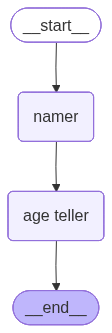

In [43]:
display(Image(a_4.get_graph().draw_mermaid_png()))

In [44]:
r_4 = a_4.invoke({"name": "John","age":"32"})
r_4

{'name': 'John', 'age': '32', 'final': 'Hi John you are 32 years old!'}

### **Conditional Node**

In [46]:
class AgentState(TypedDict):
    num_1: int
    num_2: int
    operation: str
    final_num: int

In [ ]:
def adder(state: AgentState) -> AgentState:
    """
    This node adds the two numbers
    """
    state["final_num"] = state["num_1"] + state["num_2"]
    return state 

def sub(state: AgentState) -> AgentState:
    """
    This node subtracts the two numbers"
    """
    state["final_num"] = state["num_1"] - state["num_2"]
    return

def decide_next_node(state: AgentState) -> AgentState:
    """
    This will decide the next node of graph
    """
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "sub_operation"

In [ ]:
g_5 = StateGraph(AgentState)

g_5.add_node("router",decide_next_node, lambda state:state) # In the lambda function it is saying that the input state is the output state
g_5.add_node("adder",adder)
g_5.add_node("subtractor",sub)

